In [ ]:
import pandas as pd
import numpy as np

In [ ]:
coins=["BTC","ETH","BNB","SOL","ADA","XRP","LUNA1","AVAX","DOT","DOGE","SHIB","UNI1","LTC","LINK","BCH"]
shares=[51.57*100,25.79*100,5.03*100,3.10*100,2.58*100,2.33*100,1.82*100,1.57*100,1.55*100,1.33*100,1.08*100,0.63*100,0.60*100,0.54*100,0.48*100]

In [ ]:
Df=pd.DataFrame()
len(Df)

0

In [ ]:
import time
import datetime

In [ ]:
for coin in coins:
  p=int(time.mktime(datetime.datetime(2021,4,18,23,59).timetuple()))
  p2=int(time.mktime(datetime.date.today().timetuple()))
  c=coin+"-USD"
  url=f"https://query1.finance.yahoo.com/v7/finance/download/{c}?period1={p}&period2={p2}&interval=1d&events=history&includeAdjustedClose=true"
  df=pd.read_csv(url)
  df=df[['Date','Close']]
  df.rename(columns = {'Close':coin},inplace = True)
  if(len(Df)==0):
    Df=df
  else:
    Df=pd.merge(Df, df, on='Date',how="left")
Df

Date           BTC          ETH         BNB         SOL       ADA  \
0    2021-04-18  56216.183594  2237.136963  481.034241   32.302917  1.275501   
1    2021-04-19  55724.265625  2166.188721  505.092926   31.675896  1.197959   
2    2021-04-20  56473.031250  2330.210938  587.029114   31.770054  1.265934   
3    2021-04-21  53906.089844  2364.751709  546.023560   32.513042  1.206735   
4    2021-04-22  51762.273438  2403.535156  506.013000   38.879761  1.147017   
..          ...           ...          ...         ...         ...       ...   
371  2022-04-24  39469.292969  2922.732666  399.105377   99.235794  0.886350   
372  2022-04-25  40458.308594  3009.393555  404.350281  101.247635  0.898695   
373  2022-04-26  38117.460938  2808.298340  385.483063   95.782150  0.827645   
374  2022-04-27  39241.121094  2888.929688  391.445831   98.378868  0.840595   
375  2022-04-28  39650.195313  2927.975098  402.641693   99.925461  0.847554   

          XRP      LUNA1       AVAX        DOT      DOGE      SHIB       UNI1  \
0    1.405998  13.398309  29.253094  37.347431  0.320475  0.000002  31.746319   
1    1.315044  13.906250  26.283066  34.816669  0.407318  0.000004  31.446096   
2    1.383299  13.432103  27.347954  35.444435  0.319500  0.000002  31.963188   
3    1.296498  13.281159  25.903503  33.871029  0.306925  0.000001  33.603989   
4    1.159682  13.649862  24.034962  32.988476  0.260967  0.000002  34.131321   
..        ...        ...        ...        ...       ...       ...        ...   
371  0.698739  90.560234  71.603035        NaN  0.131947  0.000024   8.726329   
372  0.694426  97.035728  72.867424        NaN  0.157959  0.000024   8.738511   
373  0.641699  88.550468  68.672058        NaN  0.137767  0.000023   8.005805   
374  0.652318  89.090111  69.857727        NaN  0.139700  0.000023   8.215011   
375  0.647757  91.549706  69.978455  17.143965  0.140486  0.000023   8.281288   

            LTC       LINK         BCH  
0    273.098816  39.065910  965.682617  
1    261.919220  35.879383  894.128723  
2    260.941345  38.950634  940.986938  
3    258.805603  36.436359  913.905762  
4    253.078354  35.233406  854.077942  
..          ...        ...         ...  
371  104.622604  13.287423  308.138397  
372  104.687019  13.458693  314.774475  
373   98.404678  12.354577  295.910400  
374  100.538757  12.733110  307.333801  
375  102.860962  12.804705  309.625214  

[376 rows x 16 columns]

In [ ]:
Df.fillna(method='ffill', inplace=True)
Df.fillna(method='bfill', inplace=True)
Df['SHIB']=Df['SHIB'].replace(0,1.0e-6)

In [ ]:
Df.describe()

BTC          ETH         BNB         SOL         ADA  \
count    376.000000   376.000000  376.000000  376.000000  376.000000   
mean   45484.157611  3164.483478  439.941930  108.325731    1.539010   
std     8565.385872   712.687130   97.379135   63.500576    0.526557   
min    29807.347656  1787.510742  261.818085   23.489555    0.790125   
25%    39185.860352  2610.740906  372.177796   42.459733    1.155931   
50%    43936.609375  3105.388916  417.493622  100.167580    1.377844   
75%    50031.748047  3690.437623  506.386276  157.677818    1.974753   
max    67566.828125  4812.087402  675.684082  258.934326    2.968239   

              XRP       LUNA1        AVAX         DOT        DOGE        SHIB  \
count  376.000000  376.000000  376.000000  376.000000  376.000000  376.000000   
mean     0.925009   45.442649   59.374751   26.895079    0.228617    0.000021   
std      0.238459   31.286892   33.168193    9.423693    0.094722    0.000015   
min      0.529336    4.107670    9.650588   10.981212    0.111608    0.000001   
25%      0.753023   15.827746   24.906403   20.252199    0.151938    0.000008   
50%      0.852647   42.514052   66.252274   24.606358    0.209469    0.000022   
75%      1.089541   73.297646   84.724457   33.441156    0.269034    0.000029   
max      1.651025  116.408920  134.531036   53.881733    0.684777    0.000080   

             UNI1         LTC        LINK          BCH  
count  376.000000  376.000000  376.000000   376.000000  
mean    20.247376  164.651693   23.541016   538.905576  
std      8.262695   53.394546    7.867937   219.445916  
min      8.005805   98.404678   12.354577   274.935089  
25%     11.936014  125.945305   16.952837   373.470833  
50%     20.206637  153.221725   23.291843   515.751159  
75%     25.655954  185.062741   27.582123   629.428879  
max     43.164505  386.450775   52.198696  1542.425049

In [ ]:
for i in reversed(range(1,len(Df))):
  for coin in coins:
    Df[coin][i]=(Df[coin][i]-Df[coin][i-1])*100/Df[coin][i-1]
Df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Date           BTC          ETH         BNB        SOL       ADA  \
0    2021-04-18  56216.183594  2237.136963  481.034241  32.302917  1.275501   
1    2021-04-19     -0.875047    -3.171386    5.001450  -1.941066 -6.079337   
2    2021-04-20      1.343698     7.571926   16.222003   0.297254  5.674234   
3    2021-04-21     -4.545429     1.482302   -6.985268   2.338643 -4.676310   
4    2021-04-22     -3.976947     1.640064   -7.327625  19.582046 -4.948725   
..          ...           ...          ...         ...        ...       ...   
371  2022-04-24     -0.044160    -0.523511   -0.634152  -1.497496 -0.242318   
372  2022-04-25      2.505785     2.965064    1.314165   2.027334  1.392791   
373  2022-04-26     -5.785827    -6.682250   -4.666058  -5.398136 -7.905908   
374  2022-04-27      2.947888     2.871182    1.546830   2.711067  1.564681   
375  2022-04-28      1.042463     1.351553    2.860131   1.572078  0.827866   

           XRP      LUNA1       AVAX        DOT       DOGE        SHIB  \
0     1.405998  13.398309  29.253094  37.347431   0.320475    0.000002   
1    -6.468999   3.791083 -10.152868  -6.776268  27.098214  100.000000   
2     5.190321  -3.409596   4.051613   1.803062 -21.560059  -50.000000   
3    -6.274927  -1.123756  -5.281752  -4.439078  -3.935837  -50.000000   
4   -10.552735   2.776136  -7.213468  -2.605628 -14.973691  100.000000   
..         ...        ...        ...        ...        ...         ...   
371  -1.266912   1.145345  -1.806058   0.000000  -1.708867    0.000000   
372  -0.617255   7.150483   1.765832   0.000000  19.713976    0.000000   
373  -7.592890  -8.744470  -5.757533   0.000000 -12.783064   -4.166667   
374   1.654826   0.609419   1.726567   0.000000   1.403094    0.000000   
375  -0.699199   2.760795   0.172820 -15.347637   0.562634    0.000000   

          UNI1         LTC       LINK         BCH  
0    31.746319  273.098816  39.065910  965.682617  
1    -0.945694   -4.093608  -8.156797   -7.409670  
2     1.644376   -0.373350   8.559933    5.240656  
3     5.133408   -0.818476  -6.455030   -2.877955  
4     1.569254   -2.212954  -3.301518   -6.546388  
..         ...         ...        ...         ...  
371  -2.364599   -0.835764  -0.421944   -1.693666  
372   0.139601    0.061569   1.288963    2.153603  
373  -8.384792   -6.001070  -8.203739   -5.992886  
374   2.613179    2.168676   3.063909    3.860426  
375   0.806779    2.309761   0.562274    0.745578  

[376 rows x 16 columns]

In [ ]:
ic15=[sum(shares)]
for i in range(1,len(Df)):
  d=((Df[coins]).iloc[[i]])
  d=d.values.tolist()[0]
  c=[]
  for i in range(len(d)):
    c.append(shares[i]+(shares[i]*d[i]/100))
  shares=c
  ic15.append(sum(c))
Df['IC15']=ic15

In [ ]:
Df.describe()

BTC          ETH         BNB         SOL         ADA  \
count    376.000000   376.000000  376.000000  376.000000  376.000000   
mean     149.490898     6.147421    1.372745    0.644876    0.056802   
std     2899.131858   115.469638   25.351473    7.359325    5.727964   
min      -13.766123   -27.200349  -33.265631  -37.208767  -26.009427   
25%       -2.127071    -2.332356   -2.335288   -3.495668   -3.287950   
50%        0.025085     0.409389    0.176866    0.141703   -0.075664   
75%        2.085546     2.904379    2.827031    3.901426    2.659858   
max    56216.183594  2237.136963  481.034241   32.302917   24.529826   

              XRP       LUNA1        AVAX         DOT        DOGE        SHIB  \
count  376.000000  376.000000  376.000000  376.000000  376.000000  376.000000   
mean    -0.022000    0.924996    0.599439    0.111751    0.039371    2.373433   
std      5.998725    8.819110    7.752851    6.805070    7.172797   27.250610   
min    -32.715778  -38.589875  -36.495044  -37.933518  -36.386258  -50.000000   
25%     -2.751209   -4.024535   -3.973248   -3.038539   -3.275859   -3.846154   
50%     -0.219247    0.614588    0.596494    0.000000   -0.244105    0.000000   
75%      2.623139    5.504677    4.516542    3.040827    2.308410    2.777778   
max     32.574284   60.451911   29.253094   37.347431   27.245599  433.333333   

             UNI1         LTC        LINK         BCH          IC15  
count  376.000000  376.000000  376.000000  376.000000    376.000000  
mean    -0.064518    0.624966    0.030786    2.443844  12202.324256  
std      6.667537   15.132656    6.908656   50.173593   3217.437942  
min    -33.200449  -35.672864  -37.238777  -35.248433   6262.196484  
25%     -3.792693   -2.943102   -3.565265   -2.878080  10211.531517  
50%      0.040198    0.035113    0.327318    0.071943  11969.581967  
75%      3.562194    2.918212    3.554648    2.497932  14111.188544  
max     46.276790  273.098816   39.065910  965.682617  20171.965401

In [ ]:
Df=Df[['Date','IC15']]
Df

Date          IC15
0    2021-04-18  10000.000000
1    2021-04-19   9974.950236
2    2021-04-20  10209.187581
3    2021-04-21   9873.835111
4    2021-04-22   9727.786995
..          ...           ...
371  2022-04-24  11778.064817
372  2022-04-25  12101.417656
373  2022-04-26  11354.109572
374  2022-04-27  11602.146736
375  2022-04-28  11734.225793

[376 rows x 2 columns]

In [ ]:
for i in reversed(range(1,len(Df))):
  Df["IC15"][i]=(Df["IC15"][i]-Df["IC15"][i-1])*100/Df["IC15"][i-1]
Df["IC15"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0      10000.000000
1         -0.250498
2          2.348256
3         -3.284811
4         -1.479143
           ...     
371       -0.283107
372        2.745382
373       -6.175376
374        2.184558
375        1.138402
Name: IC15, Length: 376, dtype: float64

In [ ]:
Df=Df[1:]
Df

Date      IC15
1    2021-04-19 -0.250498
2    2021-04-20  2.348256
3    2021-04-21 -3.284811
4    2021-04-22 -1.479143
5    2021-04-23 -1.707807
..          ...       ...
371  2022-04-24 -0.283107
372  2022-04-25  2.745382
373  2022-04-26 -6.175376
374  2022-04-27  2.184558
375  2022-04-28  1.138402

[375 rows x 2 columns]

In [ ]:
dates=(Df['Date'])[:-8]
data=Df["IC15"][:-8]
d=list()
c=list()
for day in dates:
  d.append(list(map(int,day.split('-'))))
for i in data:
  c.append([float(i)])

In [ ]:
from sklearn.svm import SVR
rbf_svr=SVR(C=1000.0,gamma=0.65)
rbf_svr.fit(d,c)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1000.0, gamma=0.65)

In [ ]:
dates=Df["Date"][-8:]
for day in dates:
  d.append(list(map(int,day.split('-'))))

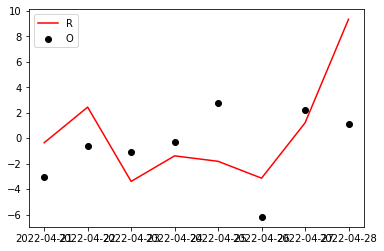

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter((Df['Date'])[-8:],Df['IC15'][-8:],color='black',label='O')
plt.plot((Df['Date'])[-8:],rbf_svr.predict(d)[:8],color='Red',label='R')
plt.legend()
plt.show()

In [ ]:
p=((datetime.datetime.now()+ datetime.timedelta(1)).strftime('%Y-%m-%d')).split('-')

In [ ]:
p

['2022', '04', '29']

In [ ]:
p=rbf_svr.predict([p])
p

array([-3.16096977])

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)


# Open our new sheet and add some data.
worksheet = gc.open('output').sheet1


worksheet.update_acell("C2",round(p[0],2))
# Go to https://sheets.google.com to see your new spreadsheet.

{'spreadsheetId': '1Krw_Crb1TNwh7CVlJtEWzd5-JYrud30wmVwPePl3eg4',
 'updatedCells': 1,
 'updatedColumns': 1,
 'updatedRange': 'Sheet1!C2',
 'updatedRows': 1}

In [ ]:
s=0
for coin in coins+['HEX','WBTC','MATIC','NEAR','STETH','CRO','DAI','TRX','RUNE','SAND','THETA','FTM','CAKE']:
  s=s+1
  p=int(time.mktime(datetime.datetime(2021,4,18,23,59).timetuple()))
  p2=int(time.mktime(datetime.date.today().timetuple()))
  c=coin+"-USD"
  url=f"https://query1.finance.yahoo.com/v7/finance/download/{c}?period1={p}&period2={p2}&interval=1d&events=history&includeAdjustedClose=true"
  df=pd.read_csv(url)
  df=df[['Date','Close']]
  df.fillna(method='ffill', inplace=True)
  df.fillna(method='bfill', inplace=True)
  if coin=="SHIB":
    df['Close']=df['Close'].replace(0,1.0e-6)
  for i in reversed(range(1,len(df))):
    df["Close"][i]=(df["Close"][i]-df["Close"][i-1])*100/df["Close"][i-1]
  df=df[1:]
  d=list()
  c=list()
  for day in df['Date']:
    d.append(list(map(int,day.split('-'))))
  for i in df['Close']:
    c.append([float(i)])
  rbf_svr=SVR(C=1000.0,gamma=0.65)
  rbf_svr.fit(d,c)
  d=[]
  sdate = datetime.datetime.now()   # start date
  dates=pd.date_range(sdate,sdate+datetime.timedelta(days=365),freq='d')
  for day in dates:
    d1=str(day).split('-')
    d.append(list(map(int,str(day.strftime("%Y-%m-%d")).split('-'))))
  p=rbf_svr.predict(d)
  x=100
  for p1 in p:
    x=x*(1+(p1/100))
  x=(x-100)/100
  gc = gspread.authorize(creds)
  worksheet = gc.open('Crypto')
  worksheet.sheet1.update_acell("A"+str(s),coin)
  worksheet.sheet1.update_acell("B"+str(s),round(x,2))
  if(round(x,2)<8):
    worksheet.sheet1.update_acell("C"+str(s),"LOW")
  if(8<round(x,2)<12):
    worksheet.sheet1.update_acell("C"+str(s),"MID")
  if(12<round(x,2)):
    worksheet.sheet1.update_acell("C"+str(s),"HIGH")
  print(x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.14651690149521826


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.25754626502966504


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.012621989235503008


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


3.3156959452683066


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.37698114400657595


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.43207203019266516


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


12.559418951636715


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2.7094188664799823


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.305696802220488


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.37666519918274355


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


26.381699552430323


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.7661077864213419


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.4801697736827436


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.387966215181856


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.5637326525940709


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


10.017503255433112


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.14566447193489793


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.641807648183839


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


8.309338553497849


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.23681418103984314


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.6545205214597036


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.009559896897481365


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.26664681848417016


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.3807143086375882


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


3.6005488858796655


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.5318986574099358


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


4.36685174206039


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.6073961809146793


In [ ]:
d

[[2022, 4, 28],
 [2022, 4, 29],
 [2022, 4, 30],
 [2022, 5, 1],
 [2022, 5, 2],
 [2022, 5, 3],
 [2022, 5, 4],
 [2022, 5, 5],
 [2022, 5, 6],
 [2022, 5, 7],
 [2022, 5, 8],
 [2022, 5, 9],
 [2022, 5, 10],
 [2022, 5, 11],
 [2022, 5, 12],
 [2022, 5, 13],
 [2022, 5, 14],
 [2022, 5, 15],
 [2022, 5, 16],
 [2022, 5, 17],
 [2022, 5, 18],
 [2022, 5, 19],
 [2022, 5, 20],
 [2022, 5, 21],
 [2022, 5, 22],
 [2022, 5, 23],
 [2022, 5, 24],
 [2022, 5, 25],
 [2022, 5, 26],
 [2022, 5, 27],
 [2022, 5, 28],
 [2022, 5, 29],
 [2022, 5, 30],
 [2022, 5, 31],
 [2022, 6, 1],
 [2022, 6, 2],
 [2022, 6, 3],
 [2022, 6, 4],
 [2022, 6, 5],
 [2022, 6, 6],
 [2022, 6, 7],
 [2022, 6, 8],
 [2022, 6, 9],
 [2022, 6, 10],
 [2022, 6, 11],
 [2022, 6, 12],
 [2022, 6, 13],
 [2022, 6, 14],
 [2022, 6, 15],
 [2022, 6, 16],
 [2022, 6, 17],
 [2022, 6, 18],
 [2022, 6, 19],
 [2022, 6, 20],
 [2022, 6, 21],
 [2022, 6, 22],
 [2022, 6, 23],
 [2022, 6, 24],
 [2022, 6, 25],
 [2022, 6, 26],
 [2022, 6, 27],
 [2022, 6, 28],
 [2022, 6, 29],
 [2022, 6,